## **Build a model that be able to predict CO_2 Emissions**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

### **Reading Data**

In [2]:
df = pd.read_csv("./data/FuelConsumptionCo2.csv")
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### **Selecting 3 key features**

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### **Separate Train and Test Data**

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### **Plotting relation between Engine Size and CO_2 Emissions**

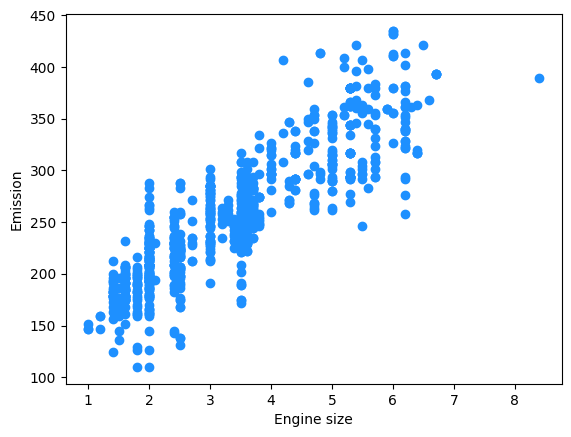

In [5]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='dodgerblue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### **Create the model**

In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.72034315]]
Intercept:  [125.82521507]


### **Plotting the model**

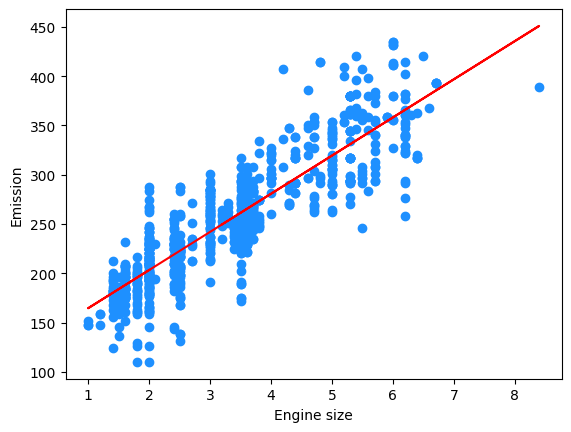

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='dodgerblue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### **Metrics of the model**

In [8]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

r2_score_1 = r2_score(test_y , test_y_)

Mean absolute error: 24.14
Residual sum of squares (MSE): 1079.92
R2-score: 0.76


### **Creating another model utilizing FUELCONSUMPTION_COMB**

#### **Separate data**

In [9]:
train_x = train[['FUELCONSUMPTION_COMB']]
test_x = test[['FUELCONSUMPTION_COMB']]

#### **Create the model**

In [10]:
regr_2 = linear_model.LinearRegression()

regr_2.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_2.coef_)
print ('Intercept: ',regr_2.intercept_)

Coefficients:  [[16.05835339]]
Intercept:  [69.96530078]


#### **Make a prediction**

In [11]:
test_y_2 = regr_2.predict(test_x)

#### **Metrics**

In [12]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

r2_score_2 = r2_score(test_y , test_y_2)

Mean absolute error: 24.14
Residual sum of squares (MSE): 1079.92
R2-score: 0.76


### **Creating another model utilizing CYLINDERS**

#### **Select data**

In [13]:
train_cyl = train[['CYLINDERS']]
test_cyl = test[['CYLINDERS']]

#### **Train the model**

In [14]:
regr_3 = linear_model.LinearRegression()

regr_3.fit(train_cyl, train_y)
# The coefficients
print ('Coefficients: ', regr_3.coef_)
print ('Intercept: ',regr_3.intercept_)

Coefficients:  [[29.37402539]]
Intercept:  [85.530988]


#### **Make a prediction**

In [15]:
test_y_cyl = regr_3.predict(test_cyl)

#### **Metrics**

In [16]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_cyl - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_cyl - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_cyl) )

r2_score_3 = r2_score(test_y , test_y_cyl)

Mean absolute error: 25.96
Residual sum of squares (MSE): 1163.08
R2-score: 0.74


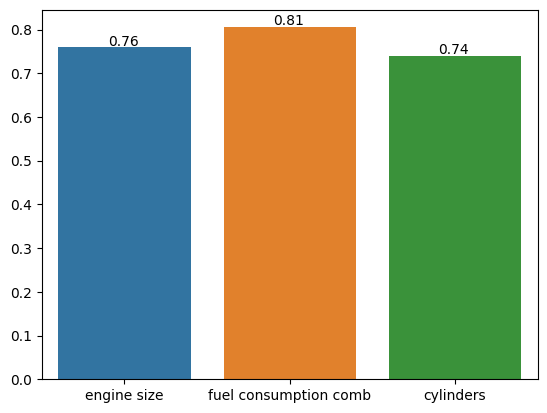

In [17]:
import seaborn as sns

models_scores = [r2_score_1, r2_score_2, r2_score_3]
models = ['engine size', 'fuel consumption comb', 'cylinders']

sns.barplot(x=models, y=models_scores)
for t, v in enumerate(models_scores):
    plt.text(t-0.1,v+0.005, str(round(v,2)))
plt.show()

## **Conclusions**

The model with the best performance was the model that was constructed consideranting 'Fuel Consumption Comb' and as result it must be the best feature into this Dataset to predict C02 emissions using a Simple Linear Regression Model.